In [1]:
import tensorflow as tf
import keras as k

from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# chestii de DL
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.models import Sequential
from keras.utils import np_utils

/Users/xkcd/.virtualenvs/machl/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# calea catre fisierul mnist
print("calea catre mnist: ",mnist.__file__)

# ca sa avem toti aceleasi rezultate
from numpy.random import seed
seed(42)

calea catre mnist:  /Users/xkcd/.virtualenvs/machl/lib/python3.6/site-packages/keras/datasets/mnist.py


# Magic numbers

In [3]:
reshaped = 28*28
nb_hidden_neurons_per_layer = 100
nb_classes = 10
optim = Adam()   # Stochastic Gradient Descent
b_size = 128
epoch = 20
valid_split = 0.2

# Import the dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Analyse the data

In [5]:
print("x_train.shape: ",x_train.shape)    # <- daca era vector len(x_train)
print("y_train.shape: ",y_train.shape)
print("x_test.shape: ",x_test.shape)
print("y_test.shape: ",y_test.shape)

x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)


# Plot some data

label:  9


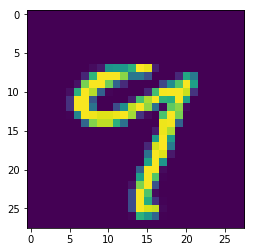

In [6]:
index = 154
plt.imshow(x_train[index])
print("label: ",y_train[index])

 In ce interval sunt datele

In [7]:
print("min pixelilor: ",np.min(x_train))
print("max pixelilor: ", np.max(x_train))

min pixelilor:  0
max pixelilor:  255


# Unroll the vectors

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0],reshaped))
x_test = np.reshape(x_test, (x_test.shape[0],reshaped))

print("x_train.shape: ",x_train.shape)
print("x_test.shape: ",x_test.shape)

x_train.shape:  (60000, 784)
x_test.shape:  (10000, 784)


# Ensure Float and Normalize

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize
x_train /= 255
x_test /= 255

print("min pixelilor: ",np.min(x_train))
print("max pixelilor: ", np.max(x_train))

min pixelilor:  0.0
max pixelilor:  1.0



# One-hot encoding

In [10]:
print("label: ",y_train[12])

label:  3


In [11]:
y_train_onehot = np_utils.to_categorical(y_train, nb_classes)
y_test_onehot = np_utils.to_categorical(y_test, nb_classes)

In [12]:
print("label: ",y_train_onehot[12])

label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Create a Neral Network

In [13]:
model = Sequential()
model.add(Dense(nb_hidden_neurons_per_layer, input_shape=(reshaped,)))
model.add(Dense(nb_hidden_neurons_per_layer))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# get some info
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

# Train the model

In [ ]:
history = model.fit(x_train, y_train_onehot, batch_size=b_size, epochs=epoch, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
  896/48000 [..............................] - ETA: 27s - loss: 1.8953 - acc: 0.3717 

# Predictions on the test data

In [ ]:
score = model.evaluate(x_test, y_test_onehot)

# Get the score and accuracy

In [ ]:
print("score: ",score[0])
print("accuracy: ",score[1])

# Find examples where the algo failed

# Get a vector of predictions

In [ ]:
y_pred = model.predict(x_test)

# Example of how one prediction looks like 

In [ ]:
# for the first element in the testing data
y_pred[0]

# We construct a vector of failed predictions

In [ ]:
# remember, we must compare y_pred with y_test
failed_pred = np.where((np.argmax(y_pred, axis=1) != np.argmax(y_test_onehot, axis=1)))
print("failed_pred")
print(failed_pred)

# We choose one failed prediction and plot it

In [ ]:
# the index is chosen from the list above (with failed predictions)
index = 362

x_test_prim = x_test[index]
# remember that we reshaped the (28,28) tensor into a (784,) vector
print("x_test_prim.shape: ",x_test_prim.shape)
# in order to plot the image, we must convert from (784,) to (28,28)
img_usable = np.expand_dims(x_test_prim, axis=0)
img_to_show = np.reshape(x_test_prim, (28,28))
plt.imshow(img_to_show)
print(img_usable.shape)
pred_prim = model.predict_classes(img_usable)
print("The prediction: ",pred_prim)
print("The reality: ",y_test[index])